## Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

from johnny_appleseed import TreeExporter

## Load the Iris Plants Dataset

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Target'] = iris.target

df.sample(10, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0
100,6.3,3.3,6.0,2.5,2
40,5.0,3.5,1.3,0.3,0
86,6.7,3.1,4.7,1.5,1
76,6.8,2.8,4.8,1.4,1
71,6.1,2.8,4.0,1.3,1


## Create and train the Decision Tree Classifier

In [3]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(df.loc[:, df.columns != 'Target'], df['Target'])

DecisionTreeClassifier(max_depth=3, random_state=0)

## Visualize the trained Decision Tree Classifier

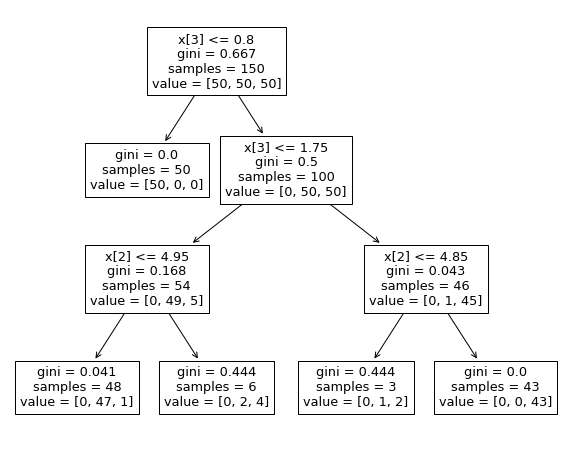

In [4]:
plt.figure(figsize=(10,8))
plot_tree(clf)
plt.show()

## Export the trained Decision Tree Classifier to Java logic

In [5]:
te = TreeExporter(clf)

exported_tree = te.export(
    language='Java',
    feature_map={
        'sepal length (cm)': 'sepalLength',
        'sepal width (cm)': 'sepalWidth',
        'petal length (cm)': 'petalength',
        'petal width (cm)': 'petalWidth'
    },
    class_map={
        0: 'Setosa',
        1: 'Iris Versicolour',
        2: 'Iris Virginica'
    },
    output_file_name=''
)

print(exported_tree)

if (petalWidth <= 0.8000) {
	System.out.println("Setosa");
} else {
	if (petalWidth <= 1.7500) {
		if (petalength <= 4.9500) {
			System.out.println("Iris Versicolour");
		} else {
			System.out.println("Iris Virginica");
		}
	} else {
		if (petalength <= 4.8500) {
			System.out.println("Iris Virginica");
		} else {
			System.out.println("Iris Virginica");
		}
	}
}



## View all available language presets

In [6]:
te.get_languages()

['.',
 'C',
 'C#',
 'C++',
 'Go',
 'Java',
 'JavaScript',
 'PHP',
 'Python',
 'Ruby',
 'SQL',
 'Swift']

## View the properties of the C language preset

In [7]:
te.get_language_preset('C')

{'indentation': '\t',
 'if': 'if (',
 'if_end': '',
 'condition': ' <= ',
 'then': ') {',
 'else': '} else {',
 'else_end': '}',
 'set': ' = ',
 'variable_operator': '',
 'feature_name_prefix': '',
 'feature_name_suffix': '',
 'result_prefix': 'printf("',
 'result_suffix': '");',
 'threshold_formatter': '.4f'}

## Export the trained Decision Tree Classifier to our made up language's logic

In [8]:
exported_tree = te.export(
    language={
        'indentation': '  ',
        'if': 'if the ',
        'if_end': '',
        'condition': ' feature is less than or equal to ',
        'then': ',',
        'else': 'otherwise,',
        'else_end': '',
        'set': ' = ',
        'variable_operator': '',
        'feature_name_prefix': '',
        'feature_name_suffix': '',
        'result_prefix': 'the sample is ',
        'result_suffix': '.',
        'threshold_formatter': '.4f'
    },
    feature_map={
        'sepal length (cm)': 'sepal length',
        'sepal width (cm)': 'sepal width',
        'petal length (cm)': 'petal length',
        'petal width (cm)': 'petal width'
    },
    class_map={
        0: 'Setosa',
        1: 'Iris Versicolour',
        2: 'Iris Virginica'
    },
    output_file_name=''
)

print(exported_tree)

if the petal width feature is less than or equal to 0.8000,
  the sample is Setosa.
otherwise,
  if the petal width feature is less than or equal to 1.7500,
    if the petal length feature is less than or equal to 4.9500,
      the sample is Iris Versicolour.
    otherwise,
      the sample is Iris Virginica.
  otherwise,
    if the petal length feature is less than or equal to 4.8500,
      the sample is Iris Virginica.
    otherwise,
      the sample is Iris Virginica.

